# KMeans clustering

KMeans is a centroid-based model: These models are based on algorithms that define a centroid for each cluster, which is updated constantly by an iterative process. The data points are assigned to the cluster where their proximity to the centroid is minimized.

The final output of the algorithm is each data point linked to the cluster it belongs to and the centroid of that cluster, which can be used to label new data in the same clusters.

<a id="importing"></a>
## Importing libraries and packages

In [1]:
# Mathematical operations and data manipulation
import pandas as pd
import numpy as np

# Model
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

# Plotting
import matplotlib.pyplot as plt

# Warnings
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

<a id="set-paths"></a>
## Set paths

In [2]:
# Path to datasets directory
data_path = "./datasets"
# Path to assets directory (for saving results to)
assets_path = "./assets"

<a id="loading-data"></a>
## Loading dataset

In [3]:
dataset = pd.read_csv(f"{data_path}/circles.csv")

<a id="exploring-data"></a>
## Exploring dataset

In [4]:
# Shape of the dataset
print("Shape of the dataset: ", dataset.shape)
# Head
dataset

Shape of the dataset:  (1500, 2)


0         1
0     0.393992 -0.416376
1     0.528243 -0.828242
2    -0.740158  0.607730
3    -0.971016  0.316821
4     0.018693 -0.605288
...        ...       ...
1495  0.085197 -0.463028
1496  0.890820  0.003483
1497  0.223768 -0.419122
1498  0.221189 -0.510314
1499  0.544376  0.049358

[1500 rows x 2 columns]

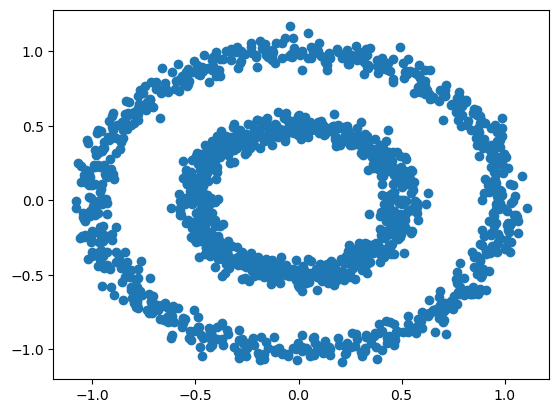

In [5]:
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1])
plt.show()

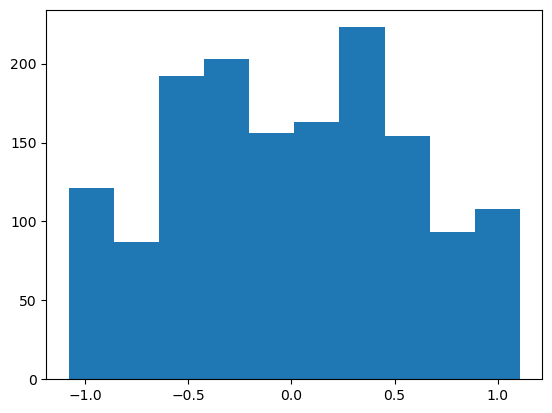

In [6]:
# Using slicing to select the feature
plt.hist(dataset.iloc[:, 0])
plt.show()

<a id="kmeans"></a>
## KMeans

In [7]:
# To choose the value for K (the ideal number of clusters), calculate
# the average distance of data points from their cluster centroid in
# relation to the number of clusters. Using 20 as the maximum number
# of clusters.
ideal_k = []
for i in range(1, 21):
    # The random_state argument is used to ensure reproducibility of
    # results
    est_kmeans = KMeans(n_clusters=i, random_state=0)
    est_kmeans.fit(dataset)
    # Append the pairs of data (number of clusters, average distance
    # to the centroid) to the list
    ideal_k.append([i, est_kmeans.inertia_])

ideal_k = np.array(ideal_k)

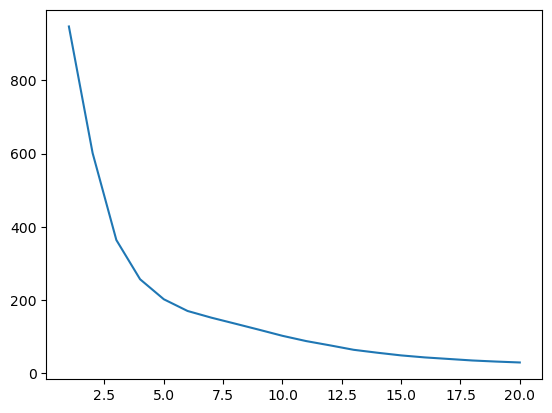

In [8]:
plt.plot(ideal_k[:, 0], ideal_k[:, 1])
plt.show()

In [9]:
est_kmeans = KMeans(n_clusters=5, random_state=0)
est_kmeans.fit(dataset)
pred_kmeans = est_kmeans.predict(dataset)

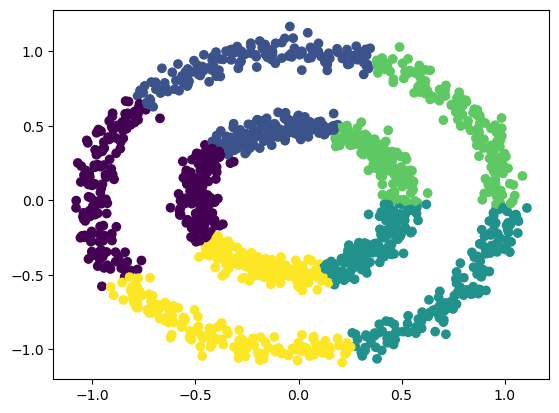

In [10]:
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], c=pred_kmeans)
plt.savefig(f"{assets_path}/circles-k-means.png", bbox_inches="tight")
plt.show()

<a id="metrics"></a>
## Metrics

In [11]:
# Silhouette
kmeans_silhouette_score = silhouette_score(
    dataset, pred_kmeans, metric="euclidean"
)
print(kmeans_silhouette_score)

0.35944240125748783


In [12]:
# Calinski_harabasz
kmeans_calinski_harabasz_score = calinski_harabasz_score(dataset, pred_kmeans)
print(kmeans_calinski_harabasz_score)

1379.6867334360659
